Mounted at /content/drive/
***** Treino *****
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0 

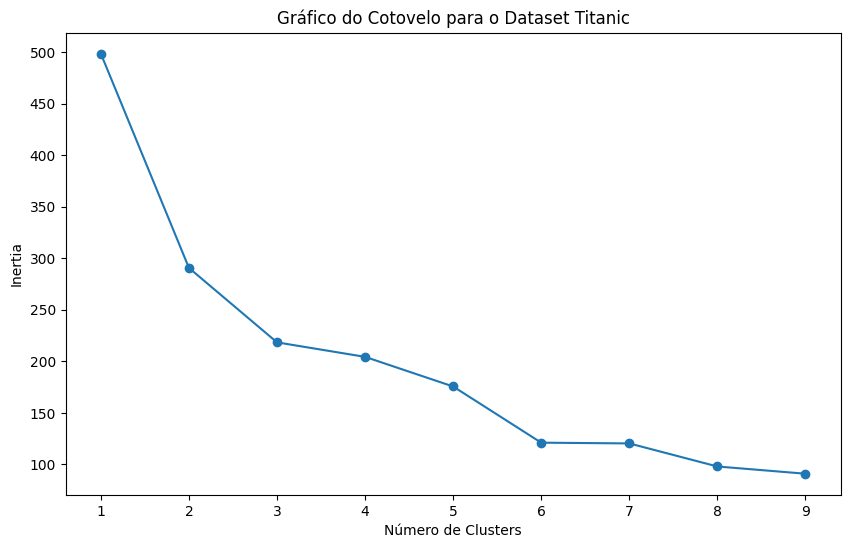

Cluster    0   1    2   3    4   5   6   7   8
Survived                                      
0         34  44  143   3  157  47   5  39  77
1         53   8   24  91   23   9  62  27  45






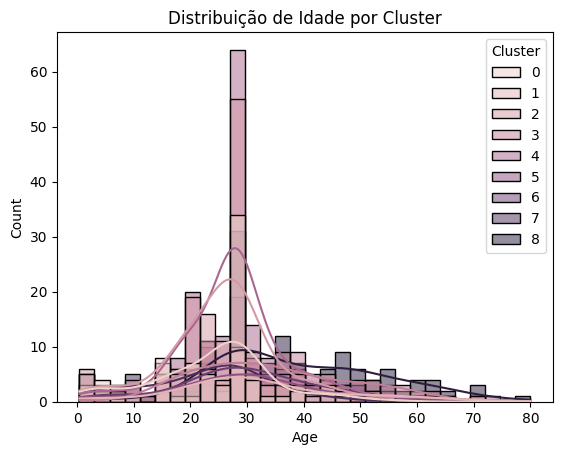

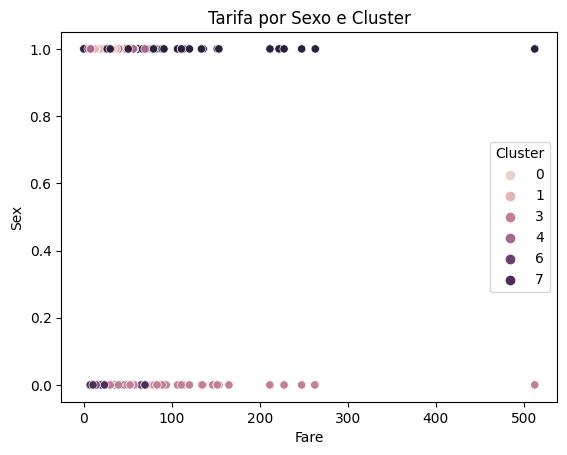

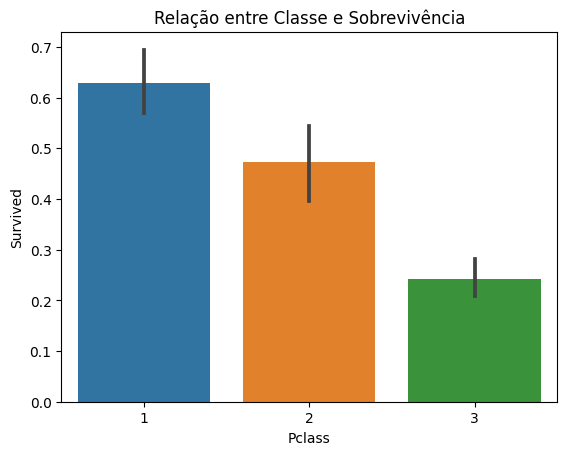

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#conectando ao drive
from google.colab import drive
drive.mount('/content/drive/')


# Carregando os dados
treino = pd.read_csv('/content/drive/MyDrive/MestradoUFPI/Aprendizagem de Maquina/titanic/train.csv')
teste = pd.read_csv('/content/drive/MyDrive/MestradoUFPI/Aprendizagem de Maquina/titanic/test.csv')

print("***** Treino *****")
print(treino.head())
print("\n")
print("***** Teste *****")
print(teste.head())
print("\n")
print("\n")
print("***** Treino *****")
print(treino.describe())
print("\n")
print("***** Teste *****")
print(teste.describe())

print("\n")
print("***** Colunas de Treino *****")
print(treino.columns.values)
print("\n")
print("\n")
# Campos vazios na lista de treino retornam o valor True abaixo
treino.isna().head()

# # Campos vazios na lista de teste retornam o valor True abaixo
teste.isna().head()

print("***** Quantidade de campos vazios no Treino *****")
print(treino.isna().sum())
print("\n")
print("***** Quantidade de campos vazios no Teste *****")
print(teste.isna().sum())

# Tratamento de valores faltantes
treino.fillna({'Age': treino['Age'].median(), 'Embarked': treino['Embarked'].mode()[0]}, inplace=True)
teste.fillna({'Age': teste['Age'].median(), 'Embarked': teste['Embarked'].mode()[0]}, inplace=True)

# Remoção de colunas não numéricas
colunas_para_remover = ['Name', 'Ticket', 'Cabin', 'Embarked']
treino.drop(colunas_para_remover, axis=1, inplace=True)
teste.drop(colunas_para_remover, axis=1, inplace=True)

# Convertendo variáveis categóricas (AQUI PRECISO QUE VC ANALISE)
labelEncoder = LabelEncoder()
treino['Sex'] = labelEncoder.fit_transform(treino['Sex'])
teste['Sex'] = labelEncoder.transform(teste['Sex'])

# Normalizando os dados
scaler = MinMaxScaler()
X = scaler.fit_transform(treino.drop('Survived', axis=1))
y = treino['Survived']

# Calculando a soma dos quadrados dentro dos clusters para diferentes números de clusters (AQUI PRECISO QUE VC ANALISE adpatei essa parte do site)
inertia = []
K_range = range(1, 10)
for k in K_range:
    #kmeans = KMeans(n_clusters=k, max_iter=600, algorithm='auto')
    kmeans = KMeans(n_clusters=k, max_iter=600, n_init="auto")
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

print("\n")
print("\n")
# Plotando o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Gráfico do Cotovelo para o Dataset Titanic')
plt.show()

# Aplicando K-Means
#kmeans = KMeans(n_clusters=2, max_iter=600, algorithm='auto')
kmeans = KMeans(n_clusters=k, max_iter=600, n_init="auto")
kmeans.fit(X)

# Avaliando a correspondência entre os clusters e a sobrevivência
treino['Cluster'] = kmeans.labels_
correspondencia = pd.crosstab(treino['Survived'], treino['Cluster'])
print(correspondencia)

print("\n")
print("\n")
# Visualizações
# Distribuição de idade por cluster
sns.histplot(data=treino, x='Age', hue='Cluster', kde=True)
plt.title('Distribuição de Idade por Cluster')
plt.show()

# Distribuição de tarifa por sexo, colorida por cluster (AQUI ESTAVA COLOcando pra testar mas nao sei se faz sentido)
sns.scatterplot(data=treino, x='Fare', y='Sex', hue='Cluster')
plt.title('Tarifa por Sexo e Cluster')
plt.show()

# Relação entre Pclass e Sobrevivência
sns.barplot(x='Pclass', y='Survived', data=treino)
plt.title('Relação entre Classe e Sobrevivência')
plt.show()
